In [1]:
import os
import sys
src = os.path.abspath(os.path.join('../'))
if src not in sys.path:
    sys.path.append(src)

In [2]:
import numpy as np
from process import DataProcessor
from data_reader import DataReader

In [3]:
reader = DataReader(rootdir='../../')

In [4]:
reader.read_data('housing.csv')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
id,,,,,,,,,,
122267.88,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
122257.86,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
122277.85,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
122287.85,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
122287.85,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
121129.48,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
121249.49,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
121259.43,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND


In [5]:
reader.df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 20640 entries, 122267.88 to 121279.37
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
processor = DataProcessor()
processor.process_data(reader.train_df)
ptrain_df = processor.processed_df
raw_df = reader.train_df
df = processor.processed_df

In [7]:
ptrain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 16 columns):
longitude               16512 non-null float64
latitude                16512 non-null float64
housing_median_age      16512 non-null float64
total_rooms             16512 non-null float64
total_bedrooms          16512 non-null float64
population              16512 non-null float64
households              16512 non-null float64
median_income           16512 non-null float64
median_house_value      16512 non-null float64
people_per_household    16512 non-null float64
bedrooms_per_room       16512 non-null float64
x0_<1H OCEAN            16512 non-null float64
x0_INLAND               16512 non-null float64
x0_ISLAND               16512 non-null float64
x0_NEAR BAY             16512 non-null float64
x0_NEAR OCEAN           16512 non-null float64
dtypes: float64(16)
memory usage: 2.0 MB


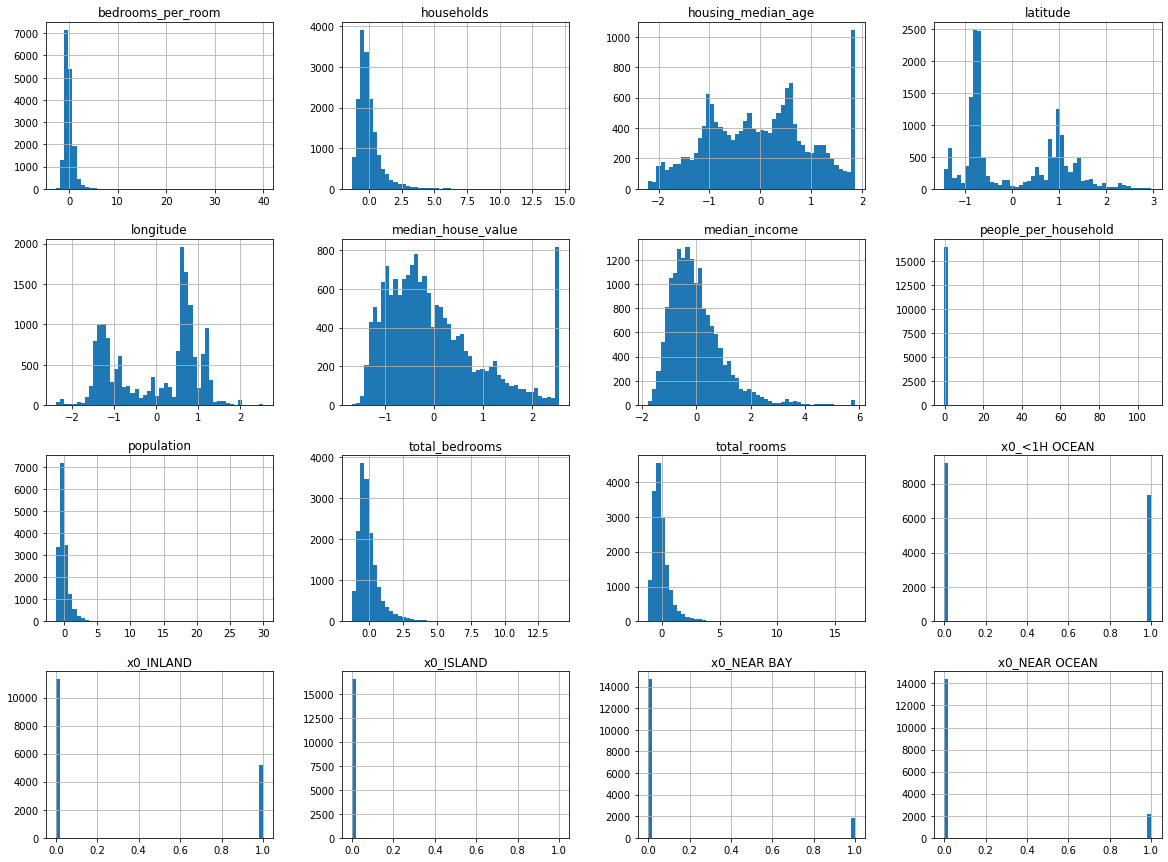

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

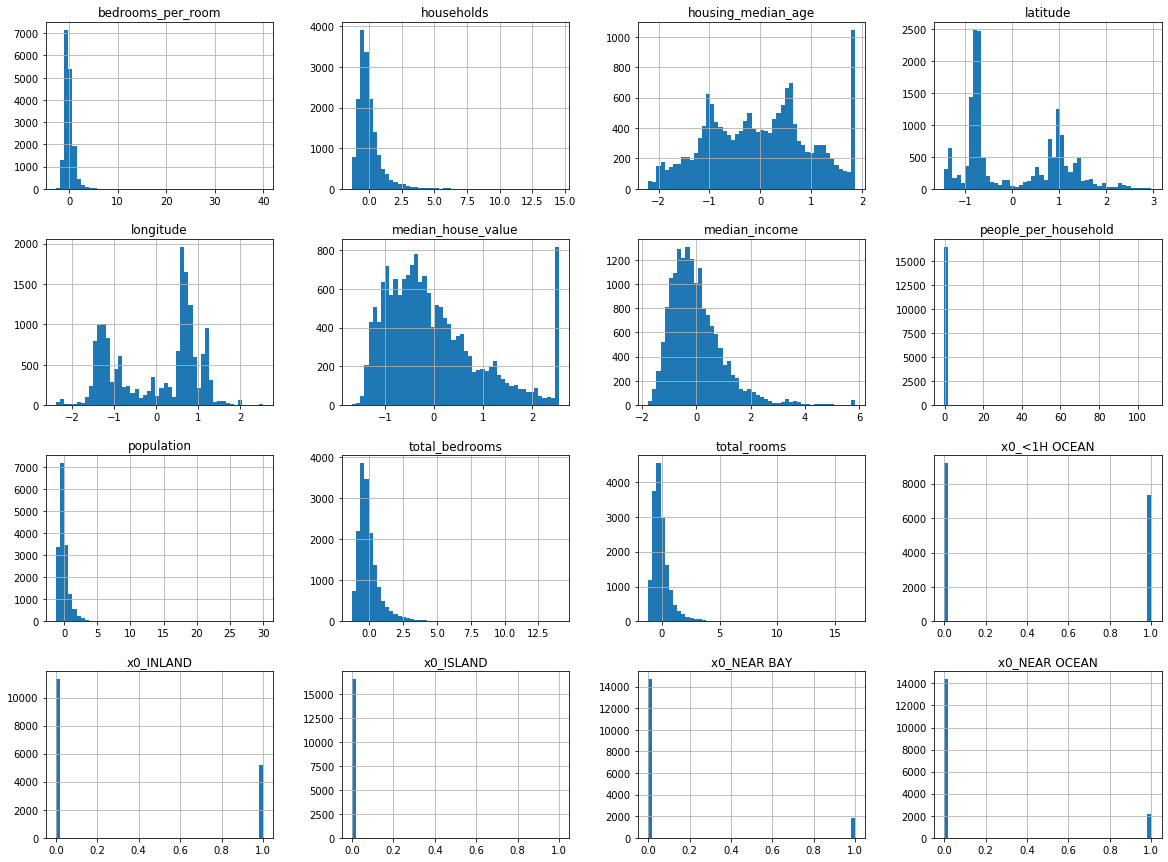

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
processor.processed_df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.688052
x0_<1H OCEAN            0.254275
x0_NEAR BAY             0.154486
x0_NEAR OCEAN           0.139295
total_rooms             0.136162
housing_median_age      0.099703
households              0.067327
total_bedrooms          0.051239
x0_ISLAND               0.026224
population             -0.022212
people_per_household   -0.022552
longitude              -0.040645
latitude               -0.145670
bedrooms_per_room      -0.233547
x0_INLAND              -0.477744
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15D4E990>,
      dtype=object)

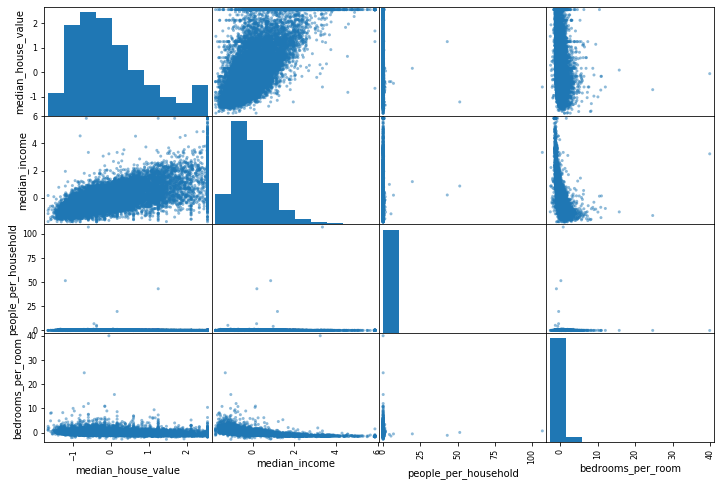

In [11]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "people_per_household", "bedrooms_per_room"]
scatter_matrix(df[attributes], figsize=(12,8))

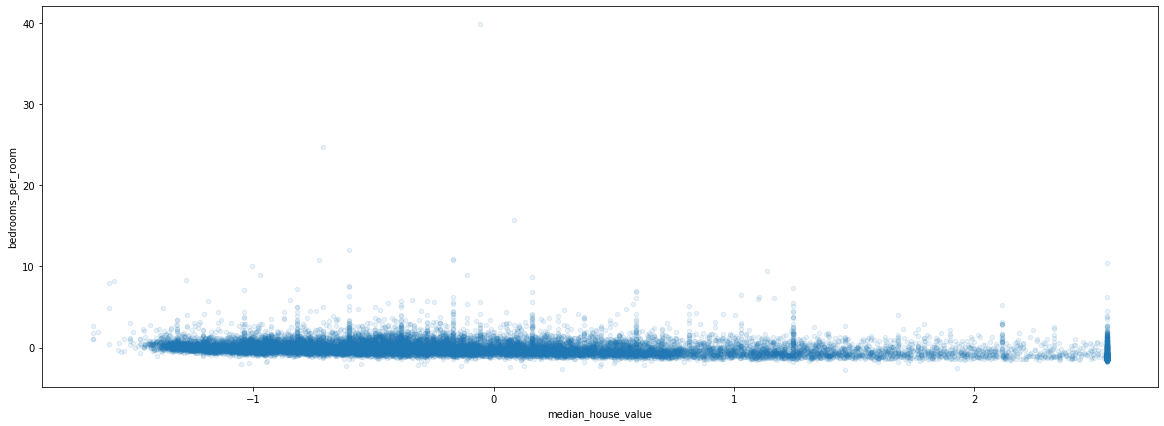

In [12]:
df.plot(kind='scatter', x='median_house_value', y='bedrooms_per_room', alpha=0.1, figsize=(20,7))

In [13]:
df.median_house_value.median()

-0.23366402930588964